In [1]:
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords

### Concat all files together 

In [2]:
all_files = glob.glob("headlines_pages/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df['date'] = pd.to_datetime(df['date']) # sets format of "date" column as datetime
df = df[df['headline'].notna()].drop_duplicates().sort_values(by='date') 
df['keywords'] = df['keywords'].apply(literal_eval)
df

,headline,date,doc_type,material_type,section,keywords
0,"Boryana Straubel, 38, Dies; Founded a ‘Green’ Jewelry Company",2021-07-01,article,Obituary (Obit),NaN,"[Deaths (Obituaries), Philanthropy, Sustainable Living, Jewels and Jewelry]"
7,Joe Rogan Is Too Big to Cancel,2021-07-01,article,News,NaN,"[Comedy and Humor, Content Type: Personal Profile, Podcasts]"
6,"As Sales Climb, Automakers Struggle to Produce Enough Cars",2021-07-02,article,News,NaN,"[Company Reports, Automobiles, Electric and Hybrid Vehicles, Shortages]"
7,And the Trumps Themselves?,2021-07-02,article,briefing,NaN,[]
2,Tesla Says Autopilot Makes Its Cars Safer. Crash Victims Say It Kills.,2021-07-05,article,News,NaN,"[Traffic Accidents and Safety, Driverless and Semiautonomous Vehicles, Electric and Hybrid Vehic..."
...,...,...,...,...,...,...
0,DeSantis Set to Announce 2024 Run on Twitter With Elon Musk,2023-05-23,article,News,NaN,"[Presidential Election of 2024, Social Media, United States Politics and Government]"
1,Your Wednesday Briefing,2023-05-24,article,News,NaN,[]
3,The DeSantis Delusion,2023-05-24,article,Op-Ed,NaN,"[Presidential Election of 2024, Primaries and Caucuses, United States Politics and Government, P..."
1,"A.I. Needs an International Watchdog, ChatGPT Creators Say",2023-05-24,article,News,NaN,"[Politics and Government, Computers and the Internet, Artificial Intelligence, Regulation and De..."


### Run sentiment analysis

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the headline and keywords
    headline = row['headline']
    keywords = row['keywords']
    
    # Combine the headline and keywords into one string
    text = headline + ' ' + ' '.join(keywords)
    # Check if "s&p 500" is in the text
    if "tesla" not in text.lower():
        continue

    
    # Get the sentiment score for the text
    sentiment = sia.polarity_scores(text)['compound']
    # Add the sentiment score to the DataFrame
    df.at[index, 'sentiment'] = sentiment
# Add a new column to the DataFrame for the date of the article
df['article_date'] = pd.to_datetime(df['date']).dt.date

# Group the DataFrame by article date and aggregate the sentiment scores
sentiment_by_day = df.groupby('article_date')['sentiment'].mean()

df['week'] = pd.to_datetime(df['date']).dt.to_period('W')
sentiment_by_week = df.groupby('week')['sentiment'].mean()


df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
sentiment_by_month = df.groupby('month')['sentiment'].mean()


len(sentiment_by_day)

481

### Sentiment by Day

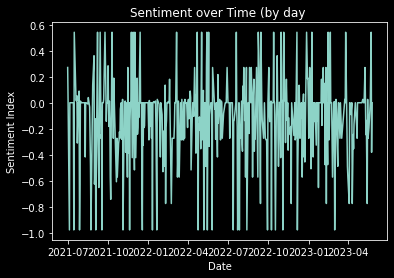

In [6]:
import matplotlib.pyplot as plt

plt.plot(sentiment_by_day.index, sentiment_by_day.values)
plt.xlabel('Date')
plt.ylabel('Sentiment Index')
plt.title('Sentiment over Time (by day ')
plt.show()


### Sentiment by Week

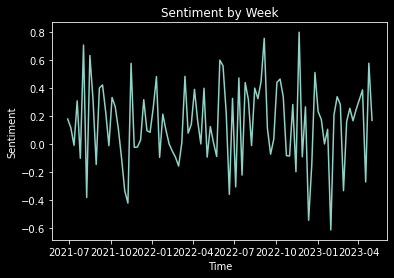

In [10]:
# plot sentiment by week with time as the x value
plt.plot(sentiment_by_week.index.to_timestamp(), sentiment_by_week.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Week')
plt.show()

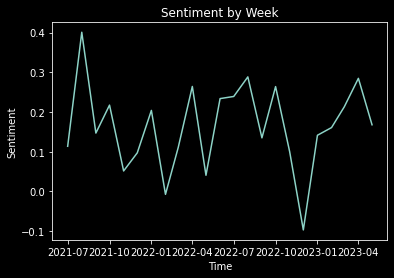

In [16]:
# plot sentiment by month with time as the x value
plt.plot(sentiment_by_month.index.to_timestamp(), sentiment_by_month.values)
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Sentiment by Month')
plt.show()